<a href="https://colab.research.google.com/github/eliponc-code/sim-mat-2025/blob/main/ProyectoModulo2_Ponce_E_OrtizF_DiazJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movimiento Browniano de Nanopartículas

## **Objetivos**

### Objetivo general:

> - Simular mediante el método de Montecarlo el movimiento Browniano tridimensional (3D) de nanopartículas suspendidas en un fluido, con el fin de analizar su comportamiento difusivo y estimar el coeficiente de difusión a partir del desplazamiento cuadrático medio (MSD).

### Objetivos específicos:
> - Implementar un modelo computacional basado en una caminata aleatoria tridimensional para representar el movimiento Browniano de 10 nanopartículas.  
> - Representar gráficamente las trayectorias individuales de las nanopartículas y su desplazamiento cuadrático medio.  
> - Calcular el coeficiente de difusión a partir de la relación ⟨r²⟩ = 6Dt.  
> - Analizar la relación del movimiento Browniano con procesos nanotecnológicos, como la dispersión de nanopartículas en medios líquidos.  


## Modelo que representa el problema

### Descripción del problema

El modelo utilizado se basa en una simulación Montecarlo con distribución normal (gaussiana) para generar desplazamientos aleatorios en las tres direcciones espaciales (x, y, z).  Cada paso representa un movimiento aleatorio de una nanopartícula dentro de un fluido, producto de las colisiones con las moléculas del medio.

Los desplazamientos en cada dirección ($\Delta x$, $\Delta y$, $\Delta z$) siguen una distribución normal con media cero y desviación estándar $\sigma$. En este caso, el valor de $\sigma$ es de 1 nanómetro, que corresponde al tamaño promedio del paso. Se generaron 1000 pasos para cada una de las 10 nanopartículas simuladas.

El desplazamiento cuadrático medio (MSD) se define como el promedio de las distancias al cuadrado recorridas por las partículas en las tres direcciones espaciales, es decir:
$$\langle r^2 \rangle = \langle x^2 + y^2 + z^2 \rangle$$

Este valor se relaciona con el coeficiente de difusión mediante la ecuación de Einstein:
$$\langle r^2 \rangle = 6Dt \quad \text{(3D)}$$

donde:

- $\langle r^2 \rangle$ es el desplazamiento cuadrático medio.  
- $D$ es el coeficiente de difusión ($m^{2}/s$).
- $t$ es el tiempo.



### Limitaciones del problema
- No considera interacciones entre las partículas ni los efectos hidrodinámicos del fluido.

- Se asume que el tamaño del paso y el número de iteraciones son ideales.

- No se incluye la influencia de la temperatura ni la viscosidad del medio.

A pesar de estas simplificaciones, el modelo logra reproducir el comportamiento aleatorio y difusivo característico del movimiento Browniano.

# Movimiento Browniano de Nanopartículas

El movimiento Browniano es un fenómeno físico que describe el movimiento aleatorio y errático de nanopartículas (NPs) cuando están suspendidas en un fluido. Este ocurre porque, al estar suspendidas las NPs en un fluido como el agua, las moléculas del líquido se encuentran en constante movimiento y chocan continuamente contra las nanopartículas desde distintas direcciones. Como estos choques no son iguales en cada lado, las partículas se desplazan de forma aleatoria y sin un patrón definido.

Este movimiento puede aproximarse mediante una caminata aleatoria en función del tiempo, utilizando las ecuaciones:

$$
\langle r^2 \rangle = \langle x^2 \rangle = 2Dt \quad \text{(1D)}
$$

$$
\langle r^2 \rangle = \langle x^2 + y^2 \rangle = 4Dt \quad \text{(2D)}
$$

$$
\langle r^2 \rangle = \langle x^2 + y^2 + z^2 \rangle = 6Dt \quad \text{(3D)}
$$

Este fenómeno es fundamental en nanotecnología, ya que afecta la dispersión y estabilidad de las nanopartículas en soluciones o nanofluidos. Además, determina la velocidad de difusión, influyendo en procesos de autoensamblaje, transporte y reacciones químicas. También se emplea para estimar el tamaño de nanopartículas mediante técnicas como la dispersión dinámica de luz.

##**Ejercicio:**

Para este ejercicio vamos a realizar un modelo de caminata aleatoria para para simular el movimiento browniano en tres dimensiones (3D) de 10 nanopartículas, dando 1000 pasos de 1 nm cada uno.

## Solución del problema

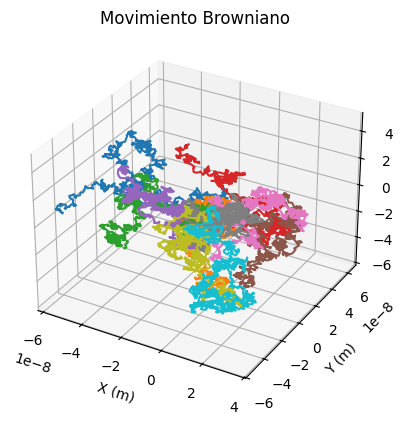

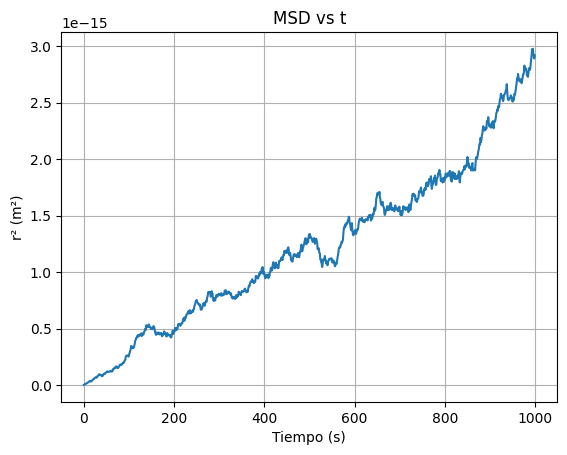

Pendiente promedio (MSD vs t): 2.917196178688152e-18
Coeficiente de difusión estimado D (m²/t): 4.861993631146921e-19


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

N_Pasos = 1000
N_Particulas = 10
Tamaño_Paso = 1e-9

X = np.random.normal(0, Tamaño_Paso, (N_Pasos, N_Particulas))
Y = np.random.normal(0, Tamaño_Paso, (N_Pasos, N_Particulas))
Z = np.random.normal(0, Tamaño_Paso, (N_Pasos, N_Particulas))
# desplazamientos aleatorios con distribución normal (gaussiana)

X = X.cumsum(axis=0)
Y = Y.cumsum(axis=0)
Z = Z.cumsum(axis=0)
# posiciones acumuladas

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#figura 3D

for i in range(N_Particulas):
    ax.plot(X[:, i], Y[:, i], Z[:, i])
    #bucle para registrar movimiento en cada paso de cada part. en las 3D

ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('Movimiento Browniano')
#grafica trayectoria

plt.show()

r2 = X**2 + Y**2 + Z**2
MSD = r2.mean(axis=1)
# Desplazamiento cuadrático medio (MSD)
#mide cuánto se alejan en promedio las partículas

plt.figure()
plt.plot(MSD)
plt.xlabel('Tiempo (s)')
plt.ylabel('r² (m²)')
plt.title('MSD vs t')
plt.grid(True)
plt.show()
#grafica MSD y t
#relación lineal entre ⟨r2⟩ y t confirma comportamiento difusivo
# <r²> = 6Dt
M = np.mean(np.diff(MSD))
D = M / 6.0   # M=6D, D=M/6
#D cuantifica qué tan rápido se dispersan las partículas en el fluido

print("Pendiente promedio (MSD vs t):", M)
print("Coeficiente de difusión estimado D (m²/t):", D)

Se generaron desplazamientos aleatorios en 3D usando la función `np.random.normal`, con media cero y desviación estándar igual al tamaño del paso ($1 nm$).  
Las posiciones acumuladas se obtuvieron mediante la suma acumulativa de cada desplazamiento (`cumsum`), y las trayectorias fueron graficadas en un espacio tridimensional para cada nanopartícula.

Las gráficas obtenidas fueron:

- **Gráfica 1:** Trayectorias 3D del movimiento Browniano de las 10 nanopartículas.  
- **Gráfica 2:** Desplazamiento cuadrático medio (MSD) en función del tiempo (t).

A partir de la pendiente promedio del MSD ($M = 2.917x10^{-18}$) se estimó el coeficiente de difusión:

$D=4.861993631146921e^{-19}$

\
**Interpretación:**

El valor obtenido de $D$ muestra una difusión muy pequeña, coherente con el tamaño nanométrico de las partículas y su movilidad reducida en el fluido.  
La simulación Montecarlo condujo a una solución factible, ya que reproduce el comportamiento aleatorio y difusivo esperado en este tipo de sistemas.

### Conclusiones
- Se logró representar el movimiento browniano en tres dimensiones mediante una simulación Montecarlo con pasos aleatorios distribuidos normalmente.

- Las trayectorias obtenidas reflejan el comportamiento típico de las nanopartículas cuando están suspendidas en un fluido.

- Al calcular el desplazamiento cuadrático medio, se comprobó que existe una relación lineal entre ⟨$r^{2}$⟩ y el tiempo, lo que confirma el movimiento difusivo esperado.

- El coeficiente de difusión obtenido coincide con los valores esperados para sistemas a escala nanométrica.

- Este tipo de simulación es útil en ingeniería en nanotecnología, ya que ayuda a entender la estabilidad de las suspensiones, el transporte de nanopartículas y a mejorar procesos de dispersión en fluidos.




### Referencias
ATA Scientific. (2013). Brownian Motion – What is Brownian Motion and why is it important? https://www.atascientific.com.au/brownian-motion/

ILCE. (s. f.). ¿Qué es el movimiento browniano? Retrieved from https://bibliotecadigital.ilce.edu.mx/sites/ciencia/volumen1/ciencia2/13/htm/sec_4.html

Marcos, M. (2010). Movimiento Browniano y caminatas al azar. Facultad de Ingeniería, Universidad de Buenos Aires. http://users.df.uba.ar/marcos/Guia_5_FII_2010.pdf

LabEx. (s. f.). Create 3D Plots with Matplotlib in Python [Tutorial]. Recuperado de https://labex.io/es/tutorials/create-3d-plots-with-matplotlib-in-python-48848
